### Import libraries

In [1]:
import pandas as pd, numpy as np, missingno as msno
import matplotlib.pyplot as plt

### Import data

In [2]:
filename = 'facies_vectors.csv'
training_data = pd.read_csv(filename)

training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')

In [3]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


### Data inspection

I use `missingno` to make a visual summary plot of each well's curves completeness. The code below turns each well into a Pandas DataFrame, then creates a matrix, then the plot.

__N.B.   The sparklines at the right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.__

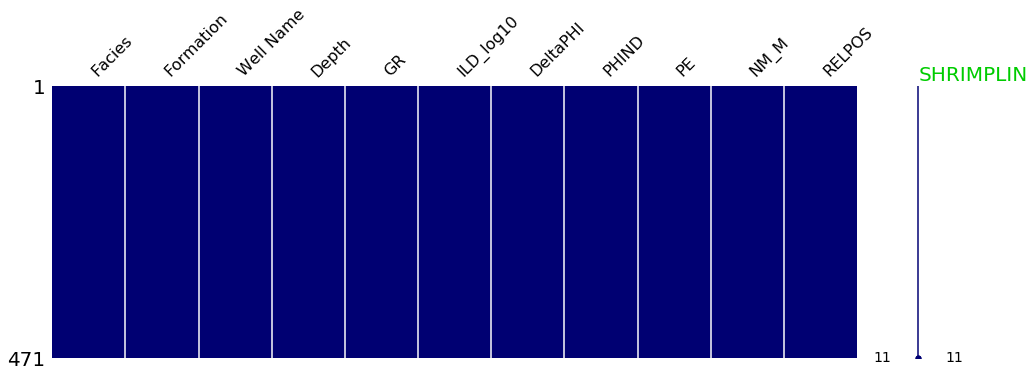

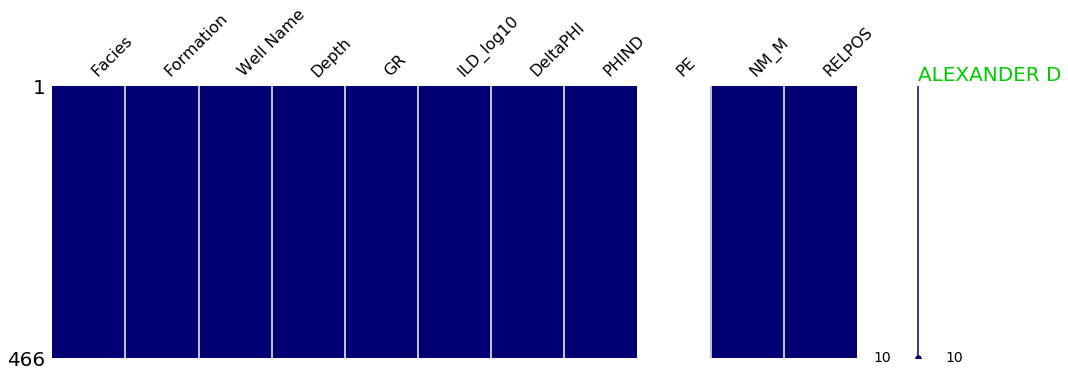

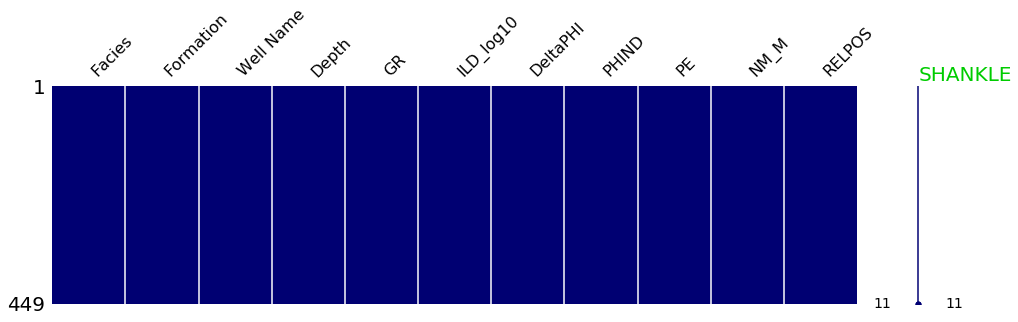

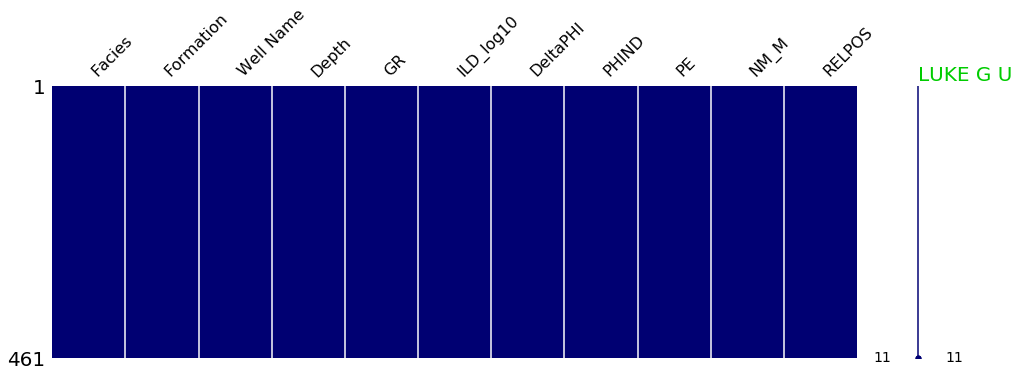

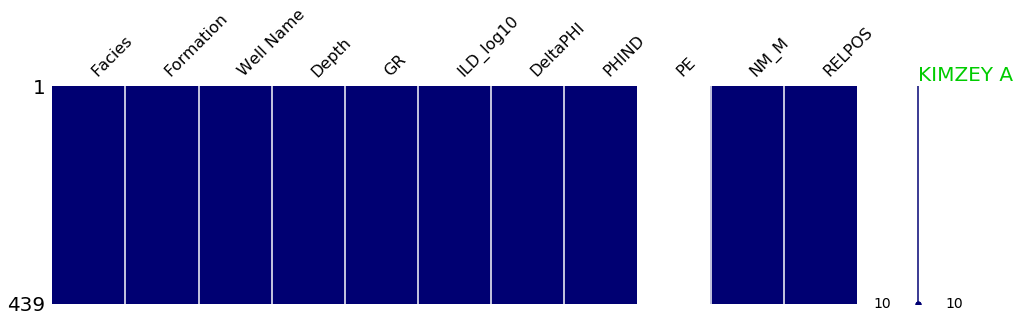

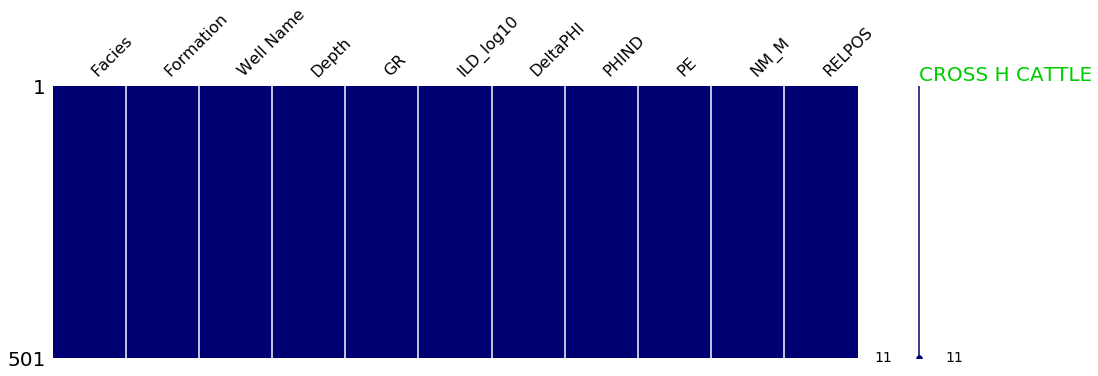

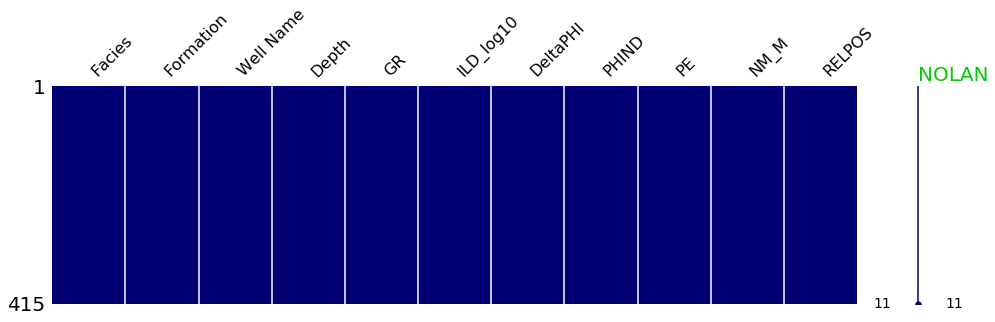

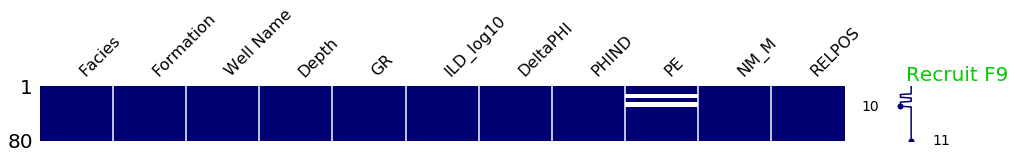

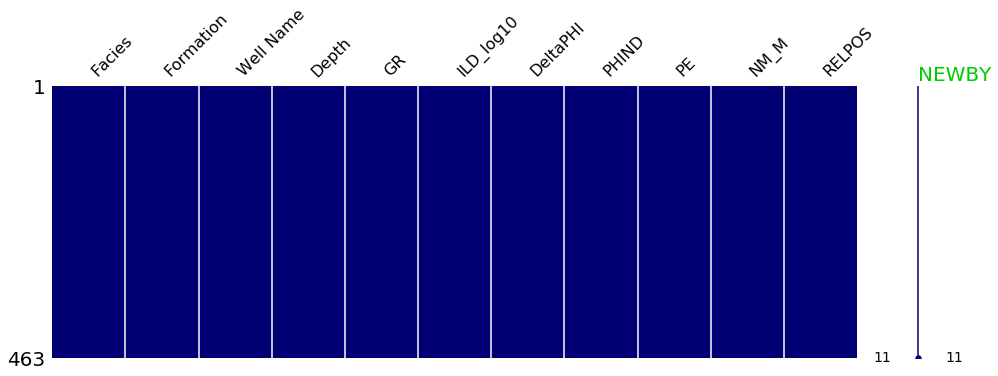

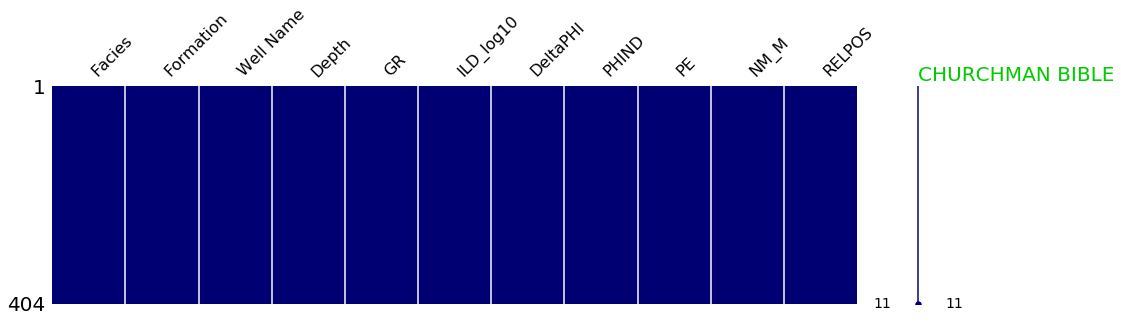

In [4]:
for well in training_data['Well Name'].unique():
    w = training_data.loc[training_data['Well Name'] == well]    
    msno.matrix(w, color=(0., 0., 0.45))   
    fig = plt.gcf()
    fig.set_size_inches(16, np.round(len(w)/100)) # heigth of the plot for each well reflects well length  
    axes=fig.get_axes()
    axes[0].set_title(well, color=(0., 0.8, 0.), fontsize=20, ha='left')  